In [15]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statistics import stdev 

## Read in truck 1 csv and select important columns for analysis. Use pandas parameters for possible speed boost.  


In [16]:
df_T1 = pd.read_csv('C:\\Users\\willi\\Desktop\\truck1.csv', index_col = "Time", usecols = ['Time','1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch8_APU_BatteryVoltage',
 'AmbientAirTemperature_V',
 'EngineSpeed',
 'VehicleSpeed',
 'GPS altitude',] ,engine = 'c', skip_blank_lines = True)


#### convert time col to datetime and view head of file, enough to view actual values.

In [17]:
df_T1.index = pd.to_datetime(df_T1.index)
print(df_T1.index)

DatetimeIndex(['2019-08-07 07:54:02.959000', '2019-08-07 07:54:03.059000',
               '2019-08-07 07:54:03.159000', '2019-08-07 07:54:03.259000',
               '2019-08-07 07:54:03.359000', '2019-08-07 07:54:03.459000',
               '2019-08-07 07:54:03.559000', '2019-08-07 07:54:03.659000',
               '2019-08-07 07:54:03.759000', '2019-08-07 07:54:03.859000',
               ...
               '2019-08-05 15:12:52.621000', '2019-08-05 15:12:52.721000',
               '2019-08-05 15:12:52.821000', '2019-08-05 15:12:52.921000',
               '2019-08-05 15:12:53.021000', '2019-08-05 15:12:53.121000',
               '2019-08-05 15:12:53.221000', '2019-08-05 15:12:53.321000',
               '2019-08-05 15:12:53.421000', '2019-08-05 15:12:53.521000'],
              dtype='datetime64[ns]', name='Time', length=1216689, freq=None)


In [18]:
list(df_T1.head())

['1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch8_APU_BatteryVoltage',
 'AmbientAirTemperature_V',
 'EngineSpeed',
 'VehicleSpeed',
 'GPS altitude']

### describe the selected data

In [19]:
df_T1.info()
df_T1.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216689 entries, 2019-08-07 07:54:02.959000 to 2019-08-05 15:12:53.521000
Data columns (total 10 columns):
1730_CH9_ AutomaticStartStop     892538 non-null float64
1730_CH10_Truck_Batteries        1216198 non-null float64
4649_Ch1_Alternator_250A         1216197 non-null float64
4649_Ch5_Fridge_50A              1216197 non-null float64
4649_Ch6_200A_APU_BatteryBank    1216197 non-null float64
4649_Ch8_APU_BatteryVoltage      1216197 non-null float64
AmbientAirTemperature_V          1216637 non-null float64
EngineSpeed                      1216645 non-null float64
VehicleSpeed                     1216645 non-null float64
GPS altitude                     1216573 non-null float64
dtypes: float64(10)
memory usage: 102.1 MB


,1730_CH9_ AutomaticStartStop,1730_CH10_Truck_Batteries,4649_Ch1_Alternator_250A,4649_Ch5_Fridge_50A,4649_Ch6_200A_APU_BatteryBank,4649_Ch8_APU_BatteryVoltage,AmbientAirTemperature_V,EngineSpeed,VehicleSpeed,GPS altitude
count,892538.000000,1.216198e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216197e+06,1.216637e+06,1.216645e+06,1.216645e+06,1.216573e+06
mean,0.008484,1.402766e+01,4.143630e+01,-2.104773e-02,-7.023623e-02,1.386995e+01,2.807985e+01,1.047636e+03,7.483319e+01,2.333260e+02
std,0.002597,5.379078e-02,3.111164e+01,5.838831e-02,4.943761e-02,2.840073e-01,2.934167e+00,1.828837e+02,3.195368e+01,4.166015e+01
min,0.000458,1.248569e+01,2.274548e+00,-4.396506e-01,-2.431907e-01,1.214054e+01,1.759375e+01,4.500000e+02,0.000000e+00,0.000000e+00
25%,0.007782,1.400092e+01,2.269303e+01,-7.152667e-02,-1.096742e-01,1.380865e+01,2.606250e+01,1.040375e+03,6.732812e+01,1.982000e+02
50%,0.009155,1.404395e+01,2.715629e+01,-1.812009e-02,-8.106355e-02,1.401144e+01,2.887500e+01,1.142125e+03,9.293750e+01,2.344000e+02
75%,0.010071,1.406134e+01,4.763199e+01,2.765698e-02,-4.291600e-02,1.404532e+01,3.025000e+01,1.146375e+03,9.312891e+01,2.636000e+02
max,0.255894,1.415427e+01,2.336585e+02,4.911498e-01,2.050431e-01,1.413001e+01,3.346875e+01,1.745375e+03,1.213672e+02,3.572000e+02


AxesSubplot(0.125,0.125;0.775x0.755)


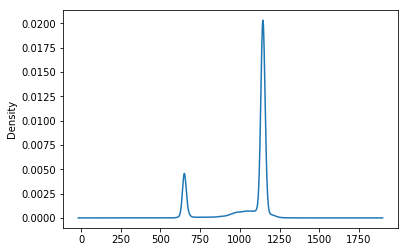

In [20]:
date3days = df_T1["2019-08-05":"2019-08-07"]

# hist_3day1 = date3days[['EngineSpeed']].hist(ec = 'yellow', bins =20)
# hist_3day4 = date3days[['4649_Ch8_APU_BatteryVoltage']].hist(ec = 'yellow', bins =20)
# hist_3day5 = date3days[['4649_Ch1_Alternator_250A']].hist(ec = 'yellow', bins =20)
# hist_3day5 = date3days[['4649_Ch4_Inverter_100A']].hist(ec = 'yellow', bins =20)
# hist_3day2 = date3days[['AmbientAirTemperature_V']].hist(ec = 'yellow', bins =20)
#hist_3day3 = date3days[['GPS altitude']].hist(ec = 'yellow', bins =20)

print(date3days['EngineSpeed'].plot.kde())
# kd2 = date3days[['AmbientAirTemperature_V']].plot.kde()
# kd3 = date3days[['GPS altitude']].plot.kde()
# kd4 = date3days[['4649_Ch6_200A_APU_BatteryBank']].plot.kde()
# kd5 = date3days[['4649_Ch1_Alternator_250A']].plot.kde()

In [23]:
print("***3 day describe***\n",date3days[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A','EngineSpeed']].describe())
print("\n______________________________________________________________________\n")


***3 day describe***
        4649_Ch8_APU_BatteryVoltage  AmbientAirTemperature_V  \
count                950905.000000            951142.000000   
mean                     13.842501                28.768137   
std                       0.303386                 2.699031   
min                      12.140536                19.312500   
25%                      13.738613                27.218750   
50%                      14.006409                29.468750   
75%                      14.041657                30.625000   
max                      14.130007                33.468750   

       4649_Ch1_Alternator_250A    EngineSpeed  
count             950905.000000  951150.000000  
mean                  41.727043    1052.641237  
std                   30.472934     179.300508  
min                    3.304532     461.500000  
25%                   22.874228    1060.375000  
50%                   27.375639    1142.500000  
75%                   49.653811    1146.875000  
max               

Engine speed
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


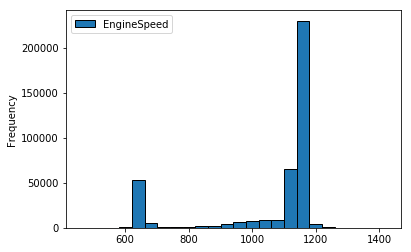

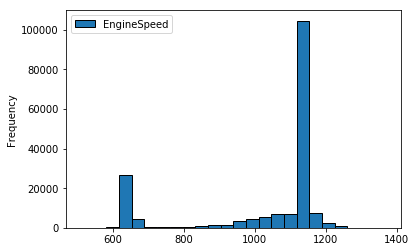

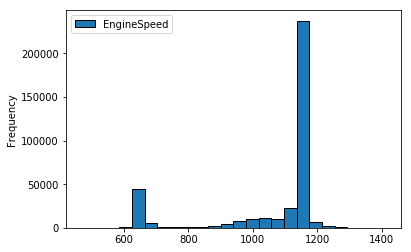

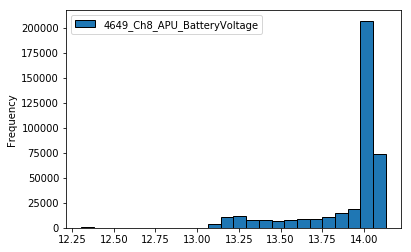

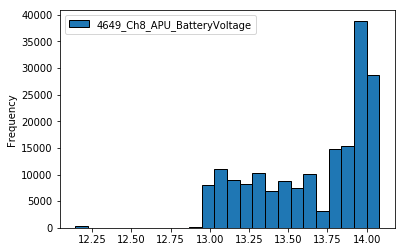

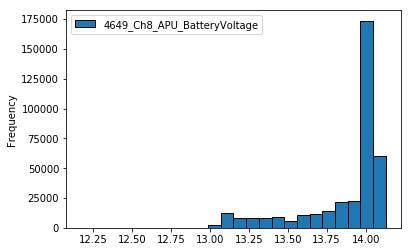

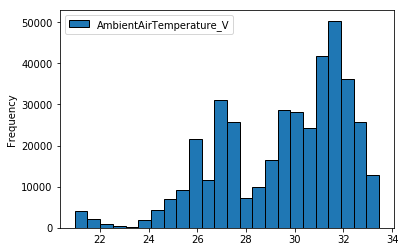

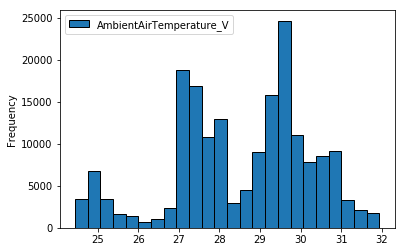

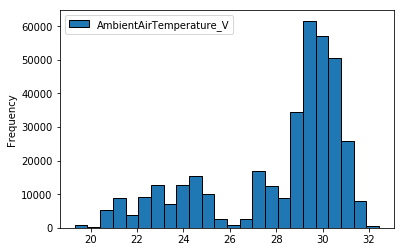

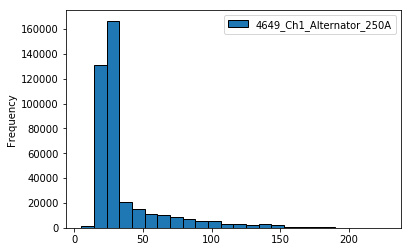

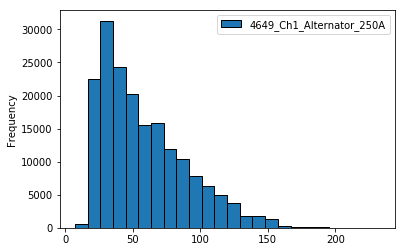

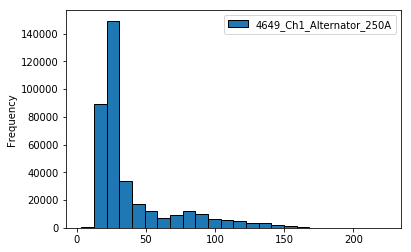

In [24]:
#daily data from time index

date85 = df_T1["2019-08-05"]
date86 = df_T1["2019-08-06"]
date87 = df_T1["2019-08-07"]

#print(date85.plot.kde()) #dont do this lol

#battery voltage day 1 to 3
print("Engine speed")
print(date85[['EngineSpeed']].plot.hist(ec= 'black',bins=24))
print(date86[['EngineSpeed']].plot.hist(ec= 'black',bins=24))
print(date87[['EngineSpeed']].plot.hist(ec= 'black',bins=24))



#print(date85[['4649_Ch8_APU_BatteryVoltage']].plot.kde())
print(date85[['4649_Ch8_APU_BatteryVoltage']].plot.hist(ec= 'black',bins=24))
print(date86[['4649_Ch8_APU_BatteryVoltage']].plot.hist(ec= 'black',bins=24))
print(date87[['4649_Ch8_APU_BatteryVoltage']].plot.hist(ec= 'black',bins=24))

#ambient temperatures day 1 to 3
print(date85[['AmbientAirTemperature_V']].plot.hist(ec= 'black',bins=24))
print(date86[['AmbientAirTemperature_V']].plot.hist(ec= 'black',bins=24))
print(date87[['AmbientAirTemperature_V']].plot.hist(ec= 'black',bins=24))

#alternator 
print(date85[['4649_Ch1_Alternator_250A']].plot.hist(ec= 'black',bins=24))
print(date86[['4649_Ch1_Alternator_250A']].plot.hist(ec= 'black',bins=24))
print(date87[['4649_Ch1_Alternator_250A']].plot.hist(ec= 'black',bins=24))



# date85 =None
# date86 = None
# date87 = None

In [25]:
print("***August 5th***\n",date85[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A','EngineSpeed']].describe())
print("\n______________________________________________________________________\n")
print("***August 6th***\n",date86[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A','EngineSpeed']].describe())
print("\n______________________________________________________________________\n")
print("***August 7th***\n",date87[['4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V','4649_Ch1_Alternator_250A','EngineSpeed']].describe())

***August 5th***
        4649_Ch8_APU_BatteryVoltage  AmbientAirTemperature_V  \
count                401504.000000            401605.000000   
mean                     13.903975                29.521066   
std                       0.264101                 2.616100   
min                      12.305333                20.968750   
25%                      13.897002                27.437500   
50%                      14.032502                30.187500   
75%                      14.047150                31.593750   
max                      14.130007                33.468750   

       4649_Ch1_Alternator_250A    EngineSpeed  
count             401504.000000  401610.000000  
mean                  36.722244    1054.688537  
std                   28.268899     178.054019  
min                    5.087930     461.500000  
25%                   22.569047    1097.625000  
50%                   25.630388    1142.250000  
75%                   33.288510    1145.375000  
max                  2

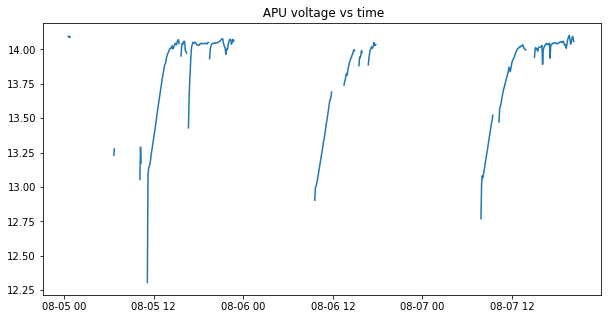

In [28]:
x1 = df_T1.dropna()
x1 = df_T1["2019-08-05":"2019-08-07":].resample("300S").mean()
x = x1.index
engSpeed = x1[['EngineSpeed']]
amTemp = x1[['AmbientAirTemperature_V']]
altAmps = x1[['4649_Ch1_Alternator_250A']]
y = x1[['4649_Ch8_APU_BatteryVoltage']]

plt.figure(figsize=(10,5))
plt.title(' APU voltage vs time')
plt.plot(x,y)



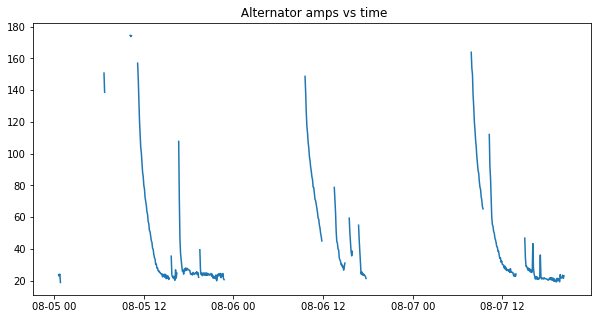

In [29]:
plt.figure(figsize=(10,5))
plt.title(' Alternator amps vs time')
ax = plt.plot(x,altAmps)


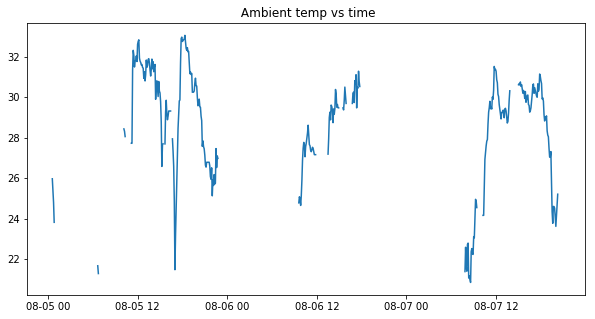

In [30]:
plt.figure(figsize=(10,5))
plt.title(' Ambient temp vs time')
ax = plt.plot(x,amTemp)

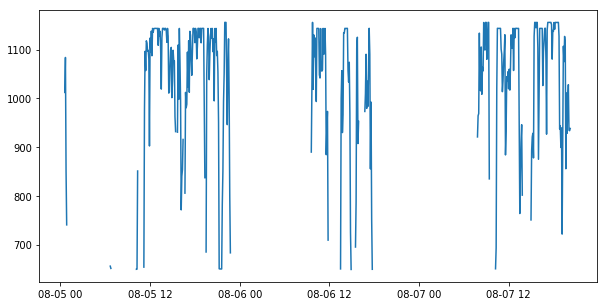

In [31]:
plt.figure(figsize=(10,5))
ax = plt.plot(x,engSpeed)

In [32]:
x1[['4649_Ch1_Alternator_250A','4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V']].describe()

,4649_Ch1_Alternator_250A,4649_Ch8_APU_BatteryVoltage,AmbientAirTemperature_V
count,339.000000,339.000000,339.000000
mean,43.912469,13.829520,28.678341
std,33.830828,0.321042,2.711256
min,18.789823,12.306884,20.842146
25%,23.282386,13.712459,27.281917
50%,26.745130,14.003543,29.409792
75%,51.042659,14.042711,30.546758
max,174.505134,14.102713,33.050875


# scatter plots with regression line

Text(0.5, 1.0, 'Alternator Amps vs APU voltage')

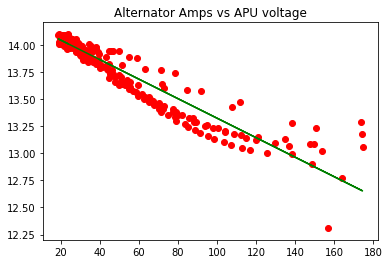

In [33]:
## plt.figure(figsize=(10,5))
x2=altAmps.dropna()
y2 = y.dropna()
linear_regressor = LinearRegression()  
linear_regressor.fit(x2, y2)  #linear reg
Y_pred = linear_regressor.predict(x2)
plt.xlabel='amps'
plt.scatter(x2,y2, color='red')
ax = plt.plot(x2,Y_pred, color='green')
plt.title('Alternator Amps vs APU voltage')

Text(0.5, 1.0, 'Engine Speed vs APU voltage')

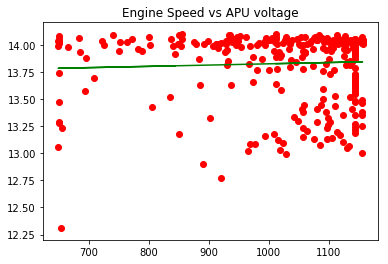

In [34]:
## plt.figure(figsize=(10,5))
x2=engSpeed.dropna()
y2 = y.dropna()
linear_regressor = LinearRegression()  
linear_regressor.fit(x2, y2)  #linear reg
Y_pred = linear_regressor.predict(x2)
plt.xlabel='amps'
plt.scatter(x2,y2, color='red')
ax = plt.plot(x2,Y_pred, color='green')
plt.title('Engine Speed vs APU voltage')

Text(0.5, 1.0, 'ambient temperature vs APU voltage')

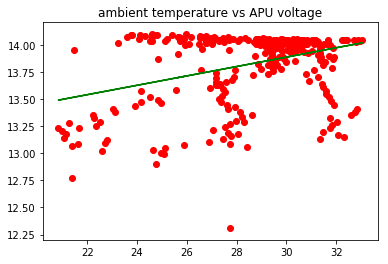

In [35]:
x2=amTemp.dropna()
y2 = y.dropna()
linear_regressor = LinearRegression()  
linear_regressor.fit(x2, y2)  #linear reg
Y_pred = linear_regressor.predict(x2)
plt.xlabel='amps'
plt.scatter(x2,y2, color='red')
ax = plt.plot(x2,Y_pred, color='green')
plt.title('ambient temperature vs APU voltage')

In [36]:
#Correlation and covariance
apuCorr = y.dropna()
altCorr = altAmps.dropna()
tempCorr = amTemp.dropna()
engineCorr = engSpeed.dropna()
print("******Alternator and APU voltage******")
print("correlation\n",np.corrcoef(apuCorr,altCorr,rowvar = False), "\n")
print("covariance\n",np.cov(apuCorr,altCorr,rowvar = False), "\n")

print("******Ambient temp and APU voltage******")
print("correlation\n",np.corrcoef(apuCorr,tempCorr,rowvar = False), "\n")
print("covariance\n",np.cov(apuCorr,tempCorr,rowvar = False), "\n")

print("******Engine speed and APU voltage******")
print("correlation\n",np.corrcoef(apuCorr,engineCorr,rowvar = False), "\n")
print("covariance\n",np.cov(apuCorr,engineCorr,rowvar = False), "\n")



#shows negative correlation 

******Alternator and APU voltage******
correlation
 [[ 1.         -0.94908348]
 [-0.94908348  1.        ]] 

covariance
 [[ 1.03068101e-01 -1.03081133e+01]
 [-1.03081133e+01  1.14452494e+03]] 

******Ambient temp and APU voltage******
correlation
 [[1.         0.36553273]
 [0.36553273 1.        ]] 

covariance
 [[0.1030681  0.31816982]
 [0.31816982 7.35091062]] 

******Engine speed and APU voltage******
correlation
 [[1.         0.05023186]
 [0.05023186 1.        ]] 

covariance
 [[1.03068101e-01 2.20561877e+00]
 [2.20561877e+00 1.87058778e+04]] 



# hypthoesis testing for apu 

In [37]:
apuvoltsMean = y2.mean()
dof = len(y2) - 1 #for a t test 
pval = ttest_1samp(y2, apuvoltsMean)

print("mean:",apuvoltsMean,"\nDegrees of freedom",dof, "\npvalue", pval)


mean: 4649_Ch8_APU_BatteryVoltage    13.82952
dtype: float64 
Degrees of freedom 338 
pvalue Ttest_1sampResult(statistic=4649_Ch8_APU_BatteryVoltage   -6.112504e-13
dtype: float64, pvalue=array([1.]))


In [38]:
#logistic regression classifier

#going to try and predict what time of day the APU unit will be "charged"
logReg = LogisticRegression()